In [1]:
import re
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import nltk 
nltk.data.path.append("/var/lib/docker/nltk_data")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns
from textblob import TextBlob
from textblob import Word
from pywsd.utils import lemmatize_sentence

Warming up PyWSD (takes ~10 secs)... took 3.522925615310669 secs.


In [2]:
data = pd.read_csv('data/ads_en_us.csv')

In [3]:
data.head()

,Unnamed: 0,catid,id,subcatid,value
0,0,2,45493,27,Overview \r\n \r\nWhy AFFIRMA Rehabilitation? ...
1,1,2,45499,27,Overview \r\n \r\nWhy AFFIRMA Rehabilitation? ...
2,2,2,45522,27,Overview:\r\n\r\nUnder general supervision by ...
3,3,2,45543,134,Be your own boss working under a Strong Brand ...
4,4,2,45545,134,Be your own boss working under a Strong Brand ...


In [4]:
Counter(data["catid"])

Counter({2: 95005, 3: 2596})

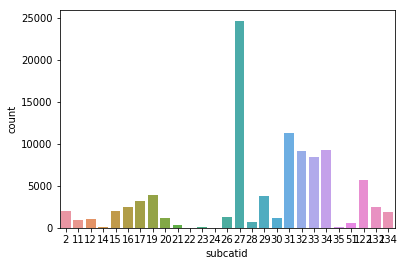

In [5]:
fax = sns.countplot(x="subcatid", data=data)
plt.show()

## Remove Duplicates in value fields 

In [3]:
data = data.drop_duplicates(subset='value',keep='last')

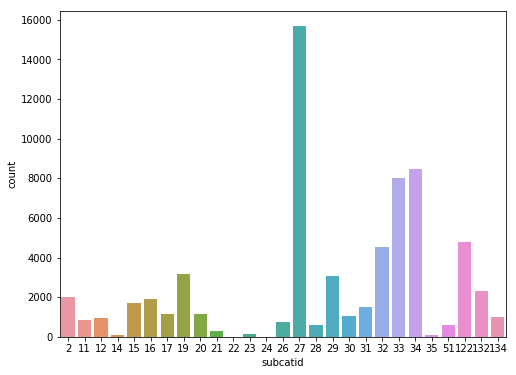

In [7]:
fig = plt.figure(figsize=(8,6))
fax = sns.countplot(x="subcatid", data=data)
plt.show()

# Handling skewness

## Keeping Data that has count > 100

In [4]:
data_27 = data.loc[data.subcatid == 27, :]
data_27s = data_27.sample(frac=0.5)
data1 = data[data.subcatid != 27]
data_s = pd.concat([data1, data_27s], axis = 0 )
data_bal=data_s.groupby('subcatid').filter(lambda x: len(x) >= 100)

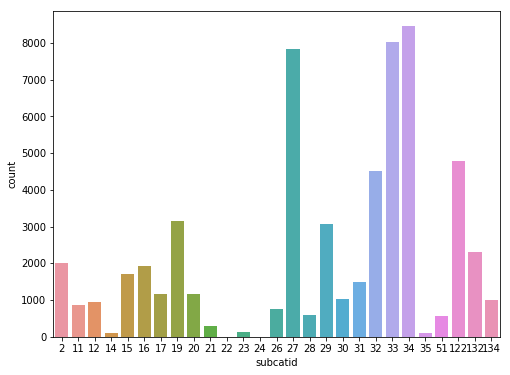

In [9]:
fig = plt.figure(figsize=(8,6))
fax = sns.countplot(x="subcatid", data=data_s)
plt.show()

In [5]:
def clean_str(s):
    """Clean sentence"""
    s = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", s)
    s = re.sub(r"\'s", " \'s", s)
    s = re.sub(r"\'ve", " \'ve", s)
    s = re.sub(r"n\'t", " n\'t", s)
    s = re.sub(r"\'re", " \'re", s)
    s = re.sub(r"\'d", " \'d", s)
    s = re.sub(r"\'ll", " \'ll", s)
    s = re.sub(r",", " , ", s)
    s = re.sub(r"!", " ! ", s)
    s = re.sub(r"\(", " \( ", s)
    s = re.sub(r"\)", " \) ", s)
    s = re.sub(r"\?", " \? ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = re.sub(r'\S*(x{2,}|X{2,})\S*',"xxx", s)
    s = re.sub(r'[^\x00-\x7F]+', "", s)
    s = re.sub(r'[^\w\s]',"",s)
    return s.strip().lower()

In [6]:
%%time
data_bal['value_processed'] = data_bal.value.apply(clean_str)

CPU times: user 54.1 s, sys: 417 ms, total: 54.5 s
Wall time: 54.6 s


/home/sorta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
data_bal=data_s.groupby('subcatid').filter(lambda x: len(x) >= 100)

In [12]:
data_bal.value_processed.head()

57     job description job description i am pleased t...
106    procurement contracts manager the opportunity ...
107    director  technical accounting and revenue rec...
113    software engineering lead architect as a softw...
118    be your own boss working under a strong brand ...
Name: value_processed, dtype: object

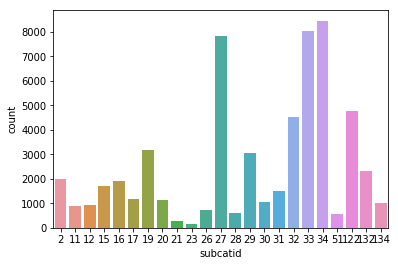

In [15]:
fax = sns.countplot(x="subcatid", data=data_bal)
plt.show()

## Remove Stop words 

In [8]:
stop_words = set(stopwords.words('english'))
stop_words.add('The')
stop_words.add('This')
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [9]:
def remove_stop_words(sentence):
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    sentence = ' '.join(filtered_sentence)
    return sentence

In [10]:
def perform_lemm(sentence):
    word_tokens = word_tokenize(sentence)
    lemm_sentence = [lemmatizer.lemmatize(w,pos='v') for w in word_tokens]
    return ' '.join(lemm_sentence)

In [11]:
%%time
data_bal['value_processed'] = data_bal.value_processed.apply(remove_stop_words)

CPU times: user 1min 22s, sys: 53.7 ms, total: 1min 22s
Wall time: 1min 22s


/home/sorta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
%%time
data_bal['value_processed_lemm'] = data_bal.value_processed.apply(perform_lemm)

CPU times: user 1min 50s, sys: 7.11 ms, total: 1min 50s
Wall time: 1min 50s


/home/sorta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
data_bal.value_processed.head(20)

57     job description job description pleased call a...
106    procurement contracts manager opportunity mark...
107    director technical accounting revenue recognit...
113    software engineering lead architect software e...
118    boss working strong brand track record success...
119    usa truck dedicated services division truck dr...
120    cynergistek cynergistek top ranked cybersecuri...
124    job description director technical accounting ...
125    job description enterprise sales development r...
127    technical revenue recognition manager opportun...
128    senior staff engineer security opportunity loo...
129    opportunity member marketo support goal provid...
130    job description trust estate probate paralegal...
131    privacy counsel opportunity marketo seeking pr...
132    enterprise sales development representative op...
133    job description staff software engineer market...
135    technical accounting manager opportunity marke...
137    job description special 

In [23]:
data_bal.value_processed_lemm.head(20)

57     job description job description please call at...
106    procurement contract manager opportunity marke...
107    director technical account revenue recognition...
113    software engineer lead architect software engi...
118    boss work strong brand track record success ca...
119    usa truck dedicate service division truck driv...
120    cynergistek cynergistek top rank cybersecurity...
124    job description director technical account rev...
125    job description enterprise sales development r...
127    technical revenue recognition manager opportun...
128    senior staff engineer security opportunity loo...
129    opportunity member marketo support goal provid...
130    job description trust estate probate paralegal...
131    privacy counsel opportunity marketo seek priva...
132    enterprise sales development representative op...
133    job description staff software engineer market...
135    technical account manager opportunity marketo ...
137    job description special 

# Starting to Perform ML functions 

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer ,TfidfTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from dask_ml.model_selection import GridSearchCV as dgs


In [14]:
X = data_bal.value_processed_lemm
y = data_bal.subcatid
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

## Using NB

In [40]:

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred,target_names=sub_cat))

accuracy 0.540032302722658


## Using OVR With Linear SVC

In [42]:
#preparing the final pipeline using the selected parameters
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])

In [43]:
#fit model with training data
model.fit(X_train, y_train)

/usr/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
       ..._class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=None))])

In [44]:
y_pred = model.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7913590216889709


# Using Random Forest Search and cross validation

In [15]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 2)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(150, 300, num = 2)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1]



# Create the random grid
random_grid = {
               'clf__n_estimators': n_estimators,
               'clf__max_depth': max_depth,
               'clf__min_samples_split': min_samples_split,
               'clf__min_samples_leaf': min_samples_leaf
              }
print(random_grid)

{'clf__n_estimators': [200, 300], 'clf__max_depth': [150, 300], 'clf__min_samples_split': [10, 20], 'clf__min_samples_leaf': [1]}


In [16]:
#preparing the final pipeline using the selected parameters
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', RandomForestClassifier(max_features='auto',bootstrap=False,random_state = 42))])

In [17]:
%%time
gs_clf_rfc = GridSearchCV(model, random_grid,cv=2,verbose=10, n_jobs=-1)
gs_clf_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  16 | elapsed: 29.6min remaining: 128.2min
[Parallel(n_jobs=-1)]: Done   5 out of  16 | elapsed: 33.2min remaining: 73.0min
[Parallel(n_jobs=-1)]: Done   7 out of  16 | elapsed: 39.8min remaining: 51.1min
[Parallel(n_jobs=-1)]: Done   9 out of  16 | elapsed: 58.0min remaining: 45.1min
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed: 60.8min remaining: 27.6min
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed: 63.5min remaining: 14.7min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 64.4min finished


CPU times: user 22min 17s, sys: 4.27 s, total: 22min 21s
Wall time: 1h 26min 37s


In [18]:
gs_clf_rfc.best_params_

{'clf__max_depth': 150,
 'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 10,
 'clf__n_estimators': 300}

In [19]:
gs_clf_rfc.best_score_

0.6969097651421507

In [20]:
%%time
model = gs_clf_rfc.best_estimator_
y_pred = model.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.7219081679741578
CPU times: user 27.7 s, sys: 128 ms, total: 27.8 s
Wall time: 27.8 s


In [28]:
vectorizer = CountVectorizer(ngram_range=(1,2))
tfidf = TfidfTransformer(use_idf=True)
rfc = RandomForestClassifier(max_features='auto',bootstrap=False,random_state = 42)
param_grid = {
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

In [23]:
%%time
X1 = vectorizer.fit_transform(X_train,y_train)
X2 = tfidf.fit_transform(X1,y_train)

CPU times: user 25.5 s, sys: 664 ms, total: 26.2 s
Wall time: 26.2 s


In [30]:
%%time
gs_cv_clf_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=2,verbose=15, n_jobs=-1)
gs_cv_clf_rfc.fit(X2, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  16 | elapsed: 41.5min remaining: 179.9min
[Parallel(n_jobs=-1)]: Done   5 out of  16 | elapsed: 50.0min remaining: 110.0min
[Parallel(n_jobs=-1)]: Done   7 out of  16 | elapsed: 59.6min remaining: 76.7min
[Parallel(n_jobs=-1)]: Done   9 out of  16 | elapsed: 75.3min remaining: 58.6min
[Parallel(n_jobs=-1)]: Done  11 out of  16 | elapsed: 81.5min remaining: 37.0min
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed: 86.8min remaining: 20.0min
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 87.9min finished


CPU times: user 21min 28s, sys: 1.46 s, total: 21min 30s
Wall time: 1h 49min 25s
